<a href="https://colab.research.google.com/github/RezaRejo/Forecasting/blob/main/EC7_REZA_APRILLIAN_NUGROHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REZA APRILLIAN NUGROHO

##Link Github

## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from collections import Counter

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

##Data Preprocessing

### Read Data

In [ ]:

df1 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_april_2019.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_august_2019.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_december_2019.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_february_2019.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_january_2019.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_july_2019.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_june_2019.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_march_2019.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_may_2019.csv')
df10 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_november_2019.csv')
df11 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_october_2019.csv')
df12 = pd.read_csv('/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/sales_data_september_2019.csv')

### Combine Data

In [ ]:
# Concatenate all the DataFrames vertically (stack them)
all_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)
df = all_data.copy()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Save Data

In [ ]:
# Specify the path where you want to save the combined data
output_file = '/content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/combined_sales_data_2019.csv'

# Export the DataFrame to CSV
df.to_csv(output_file, index=False)

print(f"Data has been successfully saved to {output_file}")

Data has been successfully saved to /content/drive/MyDrive/Dibimbing DS33B+/Colab Notebooks/ASS/EC5_EC6_EC7/EC7/combined_sales_data_2019.csv


###Info

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data Cleaning

### Convert Type

In [ ]:
# Mengonversi kolom 'Quantity Ordered' dan 'Price Each' ke tipe data numerik
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')  # coerce mengubah invalid data menjadi NaN
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')  # coerce mengubah invalid data menjadi NaN

In [ ]:
# Mengonversi kolom 'Order Date' ke tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

/tmp/ipython-input-3287342466.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


### Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,900
Price Each,900
Order Date,900
Purchase Address,545


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Handling Duplicates

In [ ]:
# Menemukan baris yang duplikat
duplicates = df[df.duplicated()]

duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
1302,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1.0,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016"
3805,180207,Apple Airpods Headphones,1.0,150.00,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001"
4196,180576,Lightning Charging Cable,1.0,14.95,2019-04-18 17:23:00,"431 Park St, Dallas, TX 75001"
...,...,...,...,...,...,...
184940,257530,USB-C Charging Cable,1.0,11.95,2019-09-03 11:13:00,"192 Johnson St, San Francisco, CA 94016"
186173,258715,Lightning Charging Cable,1.0,14.95,2019-09-15 16:50:00,"550 10th St, Portland, OR 97035"
186508,259035,27in FHD Monitor,1.0,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016"
186782,259296,Apple Airpods Headphones,1.0,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"


In [ ]:
# Menghapus duplikat secara langsung pada DataFrame yang ada
df.drop_duplicates(inplace=True)
df

/tmp/ipython-input-134120464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


### Excluding Year 2020

In [ ]:
df = df[df['Order Date'].dt.date != pd.to_datetime('2020-01-01').date()]

### Add Features

In [ ]:
# Tambahkan kolom total harga per item
df['Total'] = df['Quantity Ordered'] * df['Price Each']
df['Hour'] = df['Order Date'].dt.hour

/tmp/ipython-input-4252783964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity Ordered'] * df['Price Each']
/tmp/ipython-input-4252783964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour


## Exploratory Data Analysis (1-7)

### Metriks Marketing

In [ ]:
# Hitung total revenue
total_revenue = df['Total'].sum()

# Hitung jumlah order unik
jumlah_order = df['Order ID'].nunique()

# Hitung total barang yang terjual
jumlah_barang = df['Quantity Ordered'].sum()

# Rata-rata barang per transaksi
rata2_barang_per_order = jumlah_barang / jumlah_order

# Rata-rata spending per transaksi
rata2_spending_per_order = total_revenue / jumlah_order

print(f'Total Revenue: ${total_revenue:,.2f}')
print(f'Jumlah Order: {jumlah_order}')
print(f'Jumlah Barang Terjual: {jumlah_barang}')
print(f'Rata-rata Barang per Transaksi: {rata2_barang_per_order:.2f}')
print(f'Rata-rata Spending per Transaksi: ${rata2_spending_per_order:.2f}')

Total Revenue: $34,456,867.65
Jumlah Order: 178406
Jumlah Barang Terjual: 208771.0
Rata-rata Barang per Transaksi: 1.17
Rata-rata Spending per Transaksi: $193.14


### Total Order and GMV

####Daily

In [ ]:
daily_stats = df.groupby(df['Order Date'].dt.date).agg({
    'Order ID': pd.Series.nunique,
    'Total': 'sum'
}).rename(columns={'Order ID': 'Jumlah Order', 'Total': 'Total GMV'})

# Tampilkan hasil
print("Statistik Harian:")
display(daily_stats.head())

Statistik Harian:


,Jumlah Order,Total GMV
Order Date,,
2019-01-01,287,65681.94
2019-01-02,308,70663.20
2019-01-03,286,47046.20
2019-01-04,282,62000.22
2019-01-05,301,46524.63


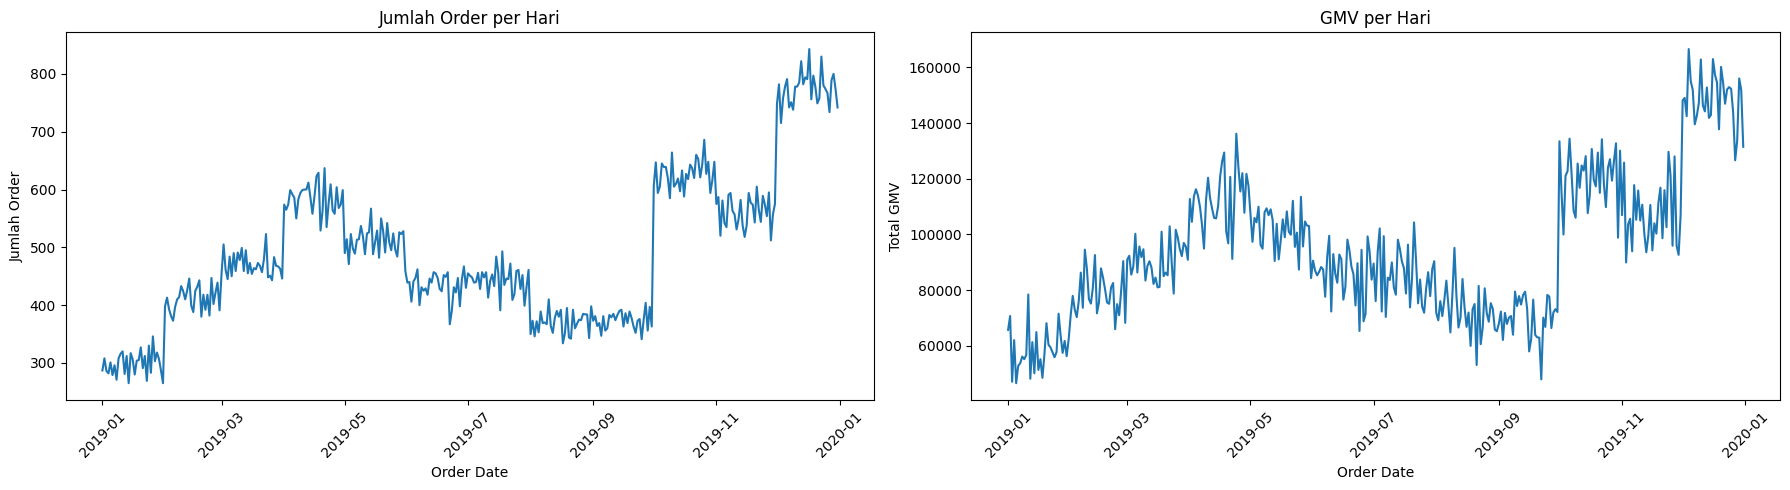

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=daily_stats, x=daily_stats.index, y='Jumlah Order', ax=axs[0])
axs[0].set_title('Jumlah Order per Hari')
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=daily_stats, x=daily_stats.index, y='Total GMV', ax=axs[1])
axs[1].set_title('GMV per Hari')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Weekly

In [ ]:
df['Week'] = df['Order Date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_stats = df.groupby('Week').agg({
    'Order ID': pd.Series.nunique,
    'Total': 'sum'
}).rename(columns={'Order ID': 'Jumlah Order', 'Total': 'Total GMV'})

print("\nStatistik Mingguan:")
display(weekly_stats.head())


Statistik Mingguan:


/tmp/ipython-input-3058426152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week'] = df['Order Date'].dt.to_period('W').apply(lambda r: r.start_time)


,Jumlah Order,Total GMV
Week,,
2018-12-31,1743,344678.73
2019-01-07,2104,409389.43
2019-01-14,2104,394921.11
2019-01-21,2134,426020.17
2019-01-28,2381,459570.62


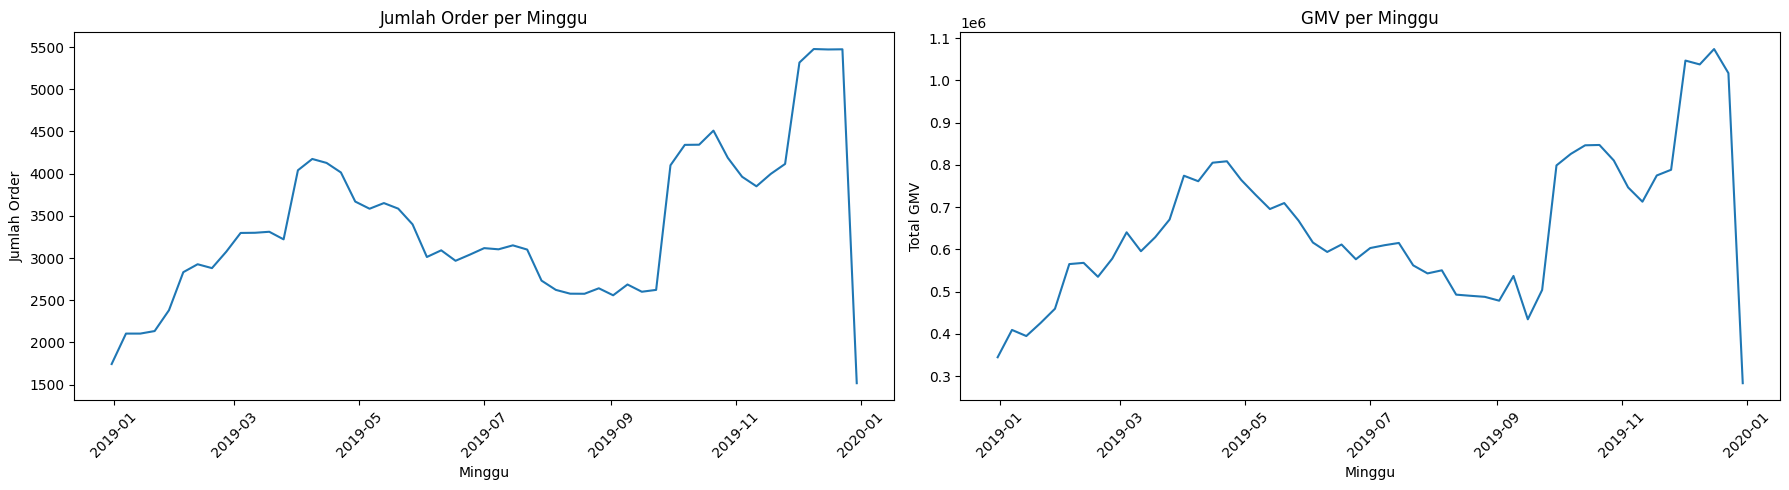

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=weekly_stats, x=weekly_stats.index, y='Jumlah Order', ax=axs[0])
axs[0].set_title('Jumlah Order per Minggu')
axs[0].set_xlabel('Minggu')
axs[0].set_ylabel('Jumlah Order')
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=weekly_stats, x=weekly_stats.index, y='Total GMV', ax=axs[1])
axs[1].set_title('GMV per Minggu')
axs[1].set_xlabel('Minggu')
axs[1].set_ylabel('Total GMV')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Monthly

In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_stats = df.groupby('Month').agg({
    'Order ID': pd.Series.nunique,
    'Total': 'sum'
}).rename(columns={'Order ID': 'Jumlah Order', 'Total': 'Total GMV'})

print("\nStatistik Bulanan:")
display(monthly_stats)


Statistik Bulanan:


/tmp/ipython-input-3302242532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].dt.to_period('M').astype(str)


,Jumlah Order,Total GMV
Month,,
2019-01,9262,1812742.87
2019-02,11496,2200078.08
2019-03,14549,2804973.35
2019-04,17528,3389217.98
2019-05,15836,3150616.23
2019-06,12989,2576280.15
2019-07,13761,2646461.32
2019-08,11484,2241083.37
2019-09,11202,2094465.69


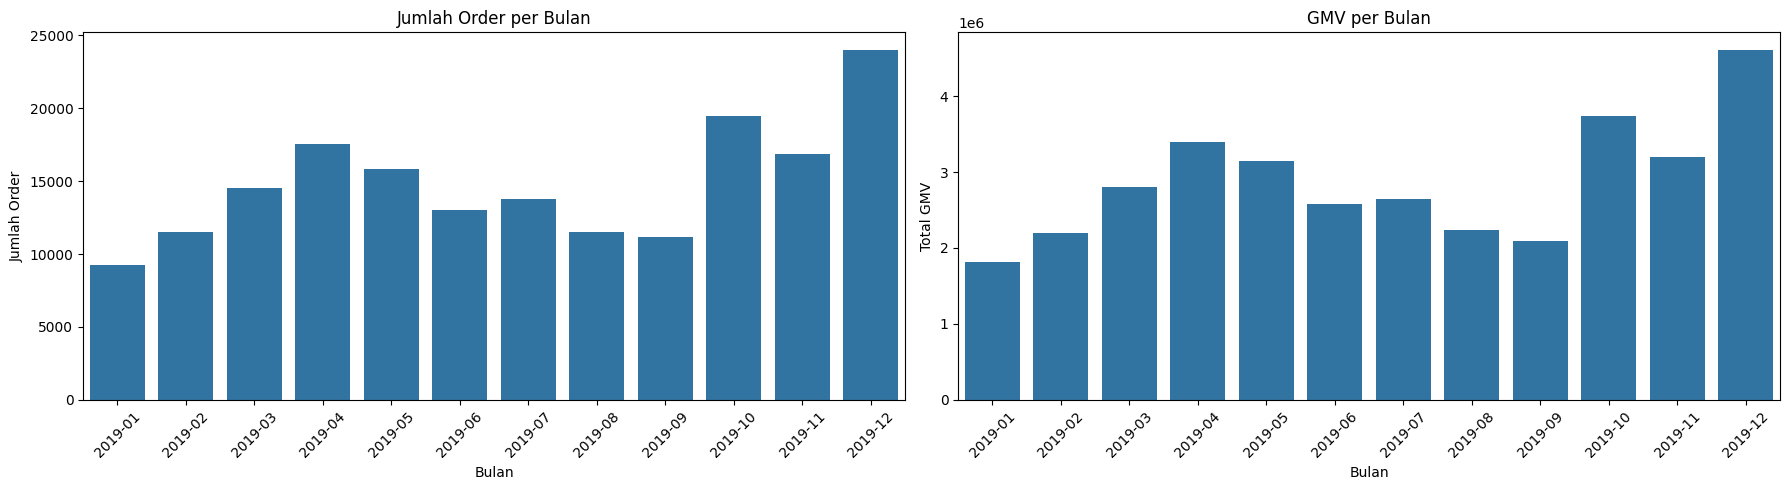

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.barplot(data=monthly_stats, x=monthly_stats.index, y='Jumlah Order', ax=axs[0])
axs[0].set_title('Jumlah Order per Bulan')
axs[0].set_xlabel('Bulan')
axs[0].set_ylabel('Jumlah Order')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(data=monthly_stats, x=monthly_stats.index, y='Total GMV', ax=axs[1])
axs[1].set_title('GMV per Bulan')
axs[1].set_xlabel('Bulan')
axs[1].set_ylabel('Total GMV')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Top 10 Products Last 3 Months

#### Last 3 Months

In [ ]:
# Ambil 3 bulan terakhir dari data
latest_date = df['Order Date'].max()
three_months_ago = latest_date - pd.DateOffset(months=3)

# Filter data dalam 3 bulan terakhir
df_3months = df[df['Order Date'] >= three_months_ago]

In [ ]:
df_3months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Hour,Week,Month
30394,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,0,2019-12-30,2019-12
30395,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,7,2019-12-23,2019-12
30396,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,18,2019-12-09,2019-12
30397,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,15,2019-12-16,2019-12
30398,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,2019-12-16,2019-12
...,...,...,...,...,...,...,...,...,...,...
184239,256859,AA Batteries (4-pack),1.0,3.84,2019-10-01 01:17:00,"644 7th St, Los Angeles, CA 90001",3.84,1,2019-09-30,2019-10
184403,257017,AAA Batteries (4-pack),3.0,2.99,2019-10-01 03:14:00,"545 Washington St, San Francisco, CA 94016",8.97,3,2019-09-30,2019-10
185681,258243,Bose SoundSport Headphones,1.0,99.99,2019-10-01 00:59:00,"306 North St, San Francisco, CA 94016",99.99,0,2019-09-30,2019-10
186710,259228,AA Batteries (4-pack),1.0,3.84,2019-10-01 02:55:00,"71 2nd St, Los Angeles, CA 90001",3.84,2,2019-09-30,2019-10


#### Top 10

Top 10 Produk Berdasarkan Revenue (3 Bulan Terakhir):


,Total
Product,
Macbook Pro Laptop,2735300.00
iPhone,1601600.00
ThinkPad Laptop,1371986.28
Google Phone,1082400.00
27in 4K Gaming Monitor,841988.41
Apple Airpods Headphones,787950.00
34in Ultrawide Monitor,786579.30
Flatscreen TV,493800.00
Bose SoundSport Headphones,453054.69


/tmp/ipython-input-1251893379.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


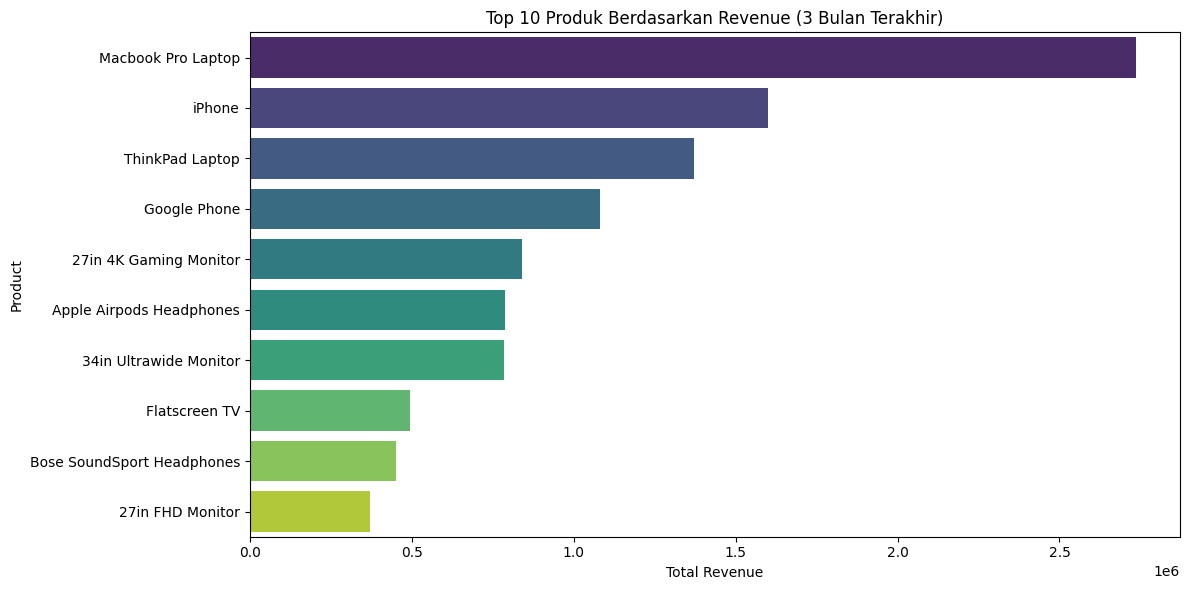

In [ ]:
# Hitung total revenue per produk
top_products = df_3months.groupby('Product')['Total'].sum().sort_values(ascending=False).head(10)

# Tampilkan hasil
print("Top 10 Produk Berdasarkan Revenue (3 Bulan Terakhir):")
display(top_products)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Produk Berdasarkan Revenue (3 Bulan Terakhir)')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

####Bundling

In [ ]:
# Ambil hanya data dengan lebih dari 1 item dalam satu order
order_counts = df_3months.groupby('Order ID').size()
multi_item_orders = order_counts[order_counts > 1].index

# Filter data order yang memiliki lebih dari 1 produk
bundle_data = df_3months[df_3months['Order ID'].isin(multi_item_orders)]

# Gabungkan produk berdasarkan order
product_pairs = []

# Group by Order ID lalu ambil kombinasi produk
for order_id, group in bundle_data.groupby('Order ID'):
    products = group['Product'].unique()
    if len(products) > 1:
        pairs = combinations(sorted(products), 2)
        product_pairs.extend(pairs)

# Hitung kombinasi yang paling sering muncul
pair_counts = Counter(product_pairs).most_common(10)

# Tampilkan hasil
print("\nTop 10 Kombinasi Produk (Bundling Candidates):")
for pair, count in pair_counts:
    print(f"{pair[0]} & {pair[1]}: {count} kali dibeli bersama")


Top 10 Kombinasi Produk (Bundling Candidates):
Google Phone & USB-C Charging Cable: 314 kali dibeli bersama
Lightning Charging Cable & iPhone: 307 kali dibeli bersama
Wired Headphones & iPhone: 163 kali dibeli bersama
Google Phone & Wired Headphones: 155 kali dibeli bersama
Apple Airpods Headphones & iPhone: 133 kali dibeli bersama
USB-C Charging Cable & Vareebadd Phone: 130 kali dibeli bersama
Bose SoundSport Headphones & Google Phone: 81 kali dibeli bersama
USB-C Charging Cable & Wired Headphones: 74 kali dibeli bersama
Vareebadd Phone & Wired Headphones: 51 kali dibeli bersama
Lightning Charging Cable & Wired Headphones: 48 kali dibeli bersama


### Top 5 City

Kolom Kota tidak tersedia dalam dataset yang ada.

### Rush Hour

In [ ]:
rush_hour_stats = df.groupby('Hour').agg({
    'Order ID': pd.Series.nunique,
    'Total': 'sum'
}).rename(columns={
    'Order ID': 'Jumlah Order',
    'Total': 'Total Revenue'
}).reset_index()

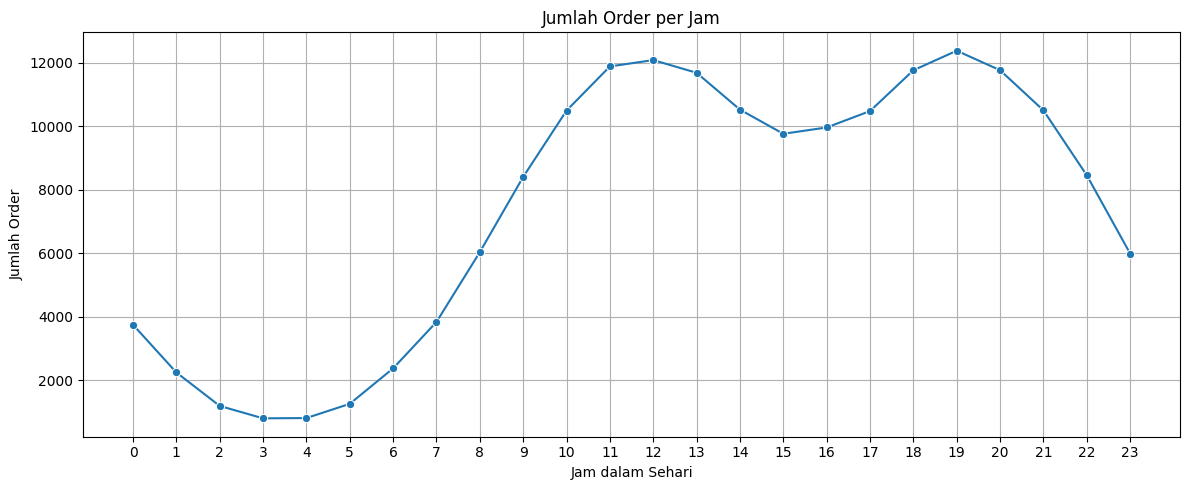

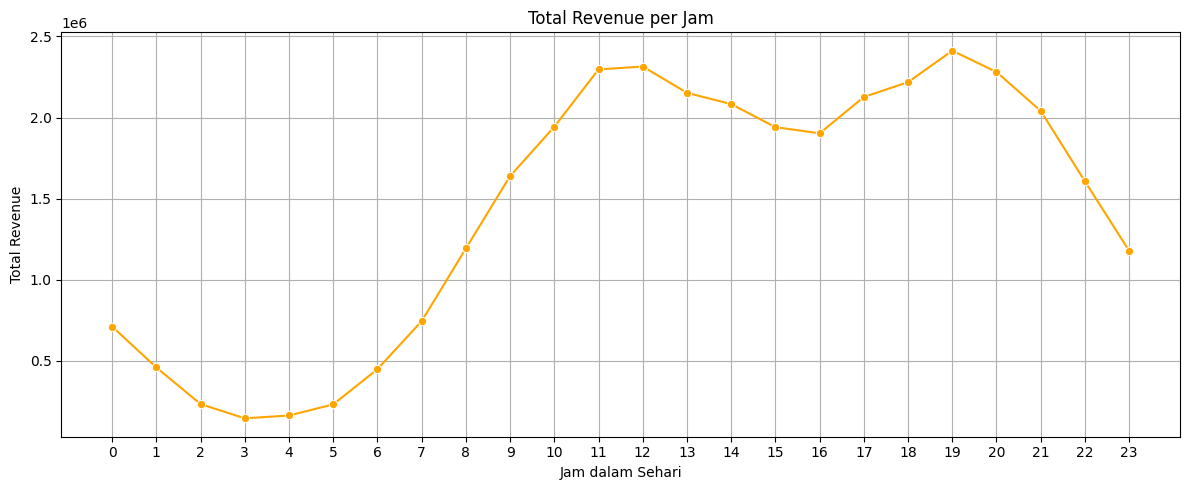

In [ ]:
# Plot jumlah order per jam
plt.figure(figsize=(12, 5))
sns.lineplot(x='Hour', y='Jumlah Order', data=rush_hour_stats, marker='o')
plt.title('Jumlah Order per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Order')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot revenue per jam
plt.figure(figsize=(12, 5))
sns.lineplot(x='Hour', y='Total Revenue', data=rush_hour_stats, marker='o', color='orange')
plt.title('Total Revenue per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Penjualan mencapai puncaknya pada pukul 11.00–13.00 dan kembali mengalami peningkatan antara pukul 18.00–20.00. Oleh karena itu, disarankan untuk menjadwalkan kampanye pemasaran seperti flash sale atau email blast menjelang waktu-waktu tersebut guna meningkatkan tingkat konversi secara optimal.

## EDA (Time Series Deep Dive Analytics)

In [ ]:
# set index
df.set_index('Order Date', inplace=True)

In [ ]:
# Agregasi total penjualan per hari
df_daily = df.resample('D').agg(
    {
        'Order ID': pd.Series.nunique,  # Number of unique orders each day
    }
).rename(columns={'Order ID': 'total_orders', 'Total': 'Revenue'})

In [ ]:
df_daily

,total_orders
Order Date,
2019-01-01,287
2019-01-02,308
2019-01-03,286
2019-01-04,282
2019-01-05,301
...,...
2019-12-27,734
2019-12-28,789
2019-12-29,800


### Time Series

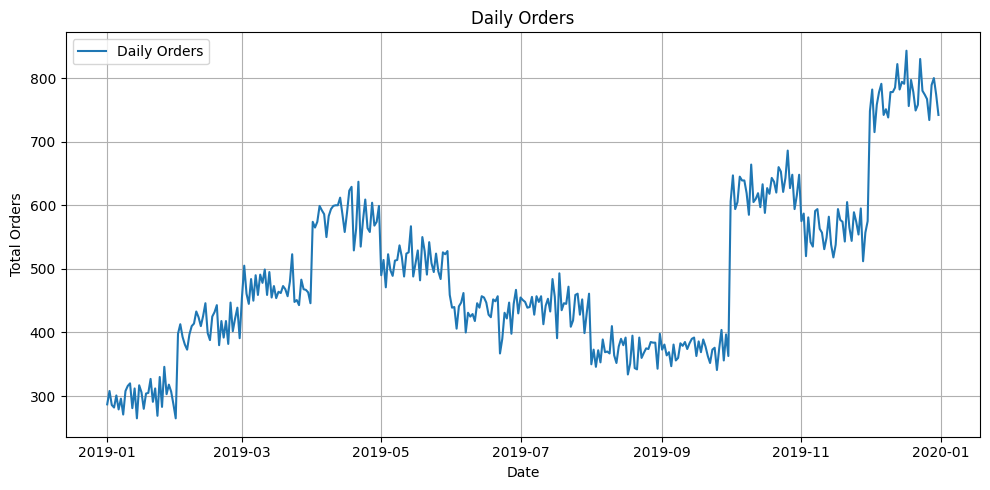

In [ ]:
# Visualisasi Time Series
plt.figure(figsize=(10,5))
plt.plot(df_daily, label='Daily Orders')
plt.title('Daily Orders')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Decomposition

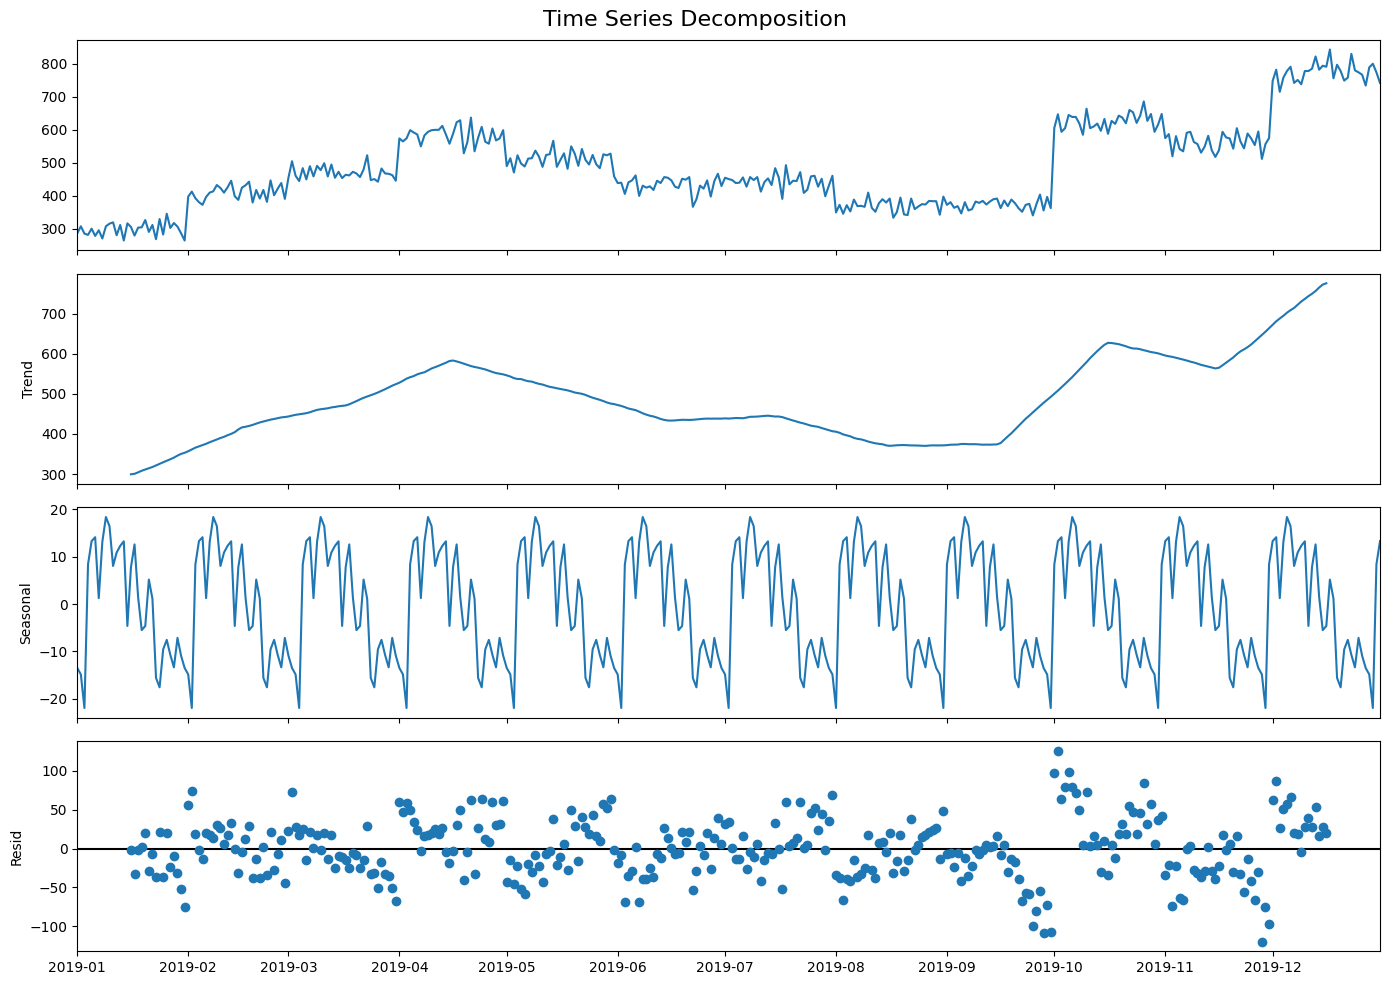

In [ ]:
# Decomposition
decomposition = seasonal_decompose(df_daily, model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

### ADF Test

In [ ]:
# Uji Stasioneritas - ADF Test
result = adfuller(df_daily.dropna())
print("== ADF Test ==")
print(f"ADF Statistic : {result[0]}")
print(f"p-value       : {result[1]}")
for key, value in result[4].items():
    print(f"Critical Value ({key}) : {value}")
if result[1] <= 0.05:
    print("Kesimpulan: Data stasioner (tolak H0)")
else:
    print("Kesimpulan: Data tidak stasioner (gagal tolak H0)")

== ADF Test ==
ADF Statistic : -1.1310849155859048
p-value       : 0.7025177855652346
Critical Value (1%) : -3.4485948978753314
Critical Value (5%) : -2.86957971128312
Critical Value (10%) : -2.571053050314224
Kesimpulan: Data tidak stasioner (gagal tolak H0)


### ACF dan PACF

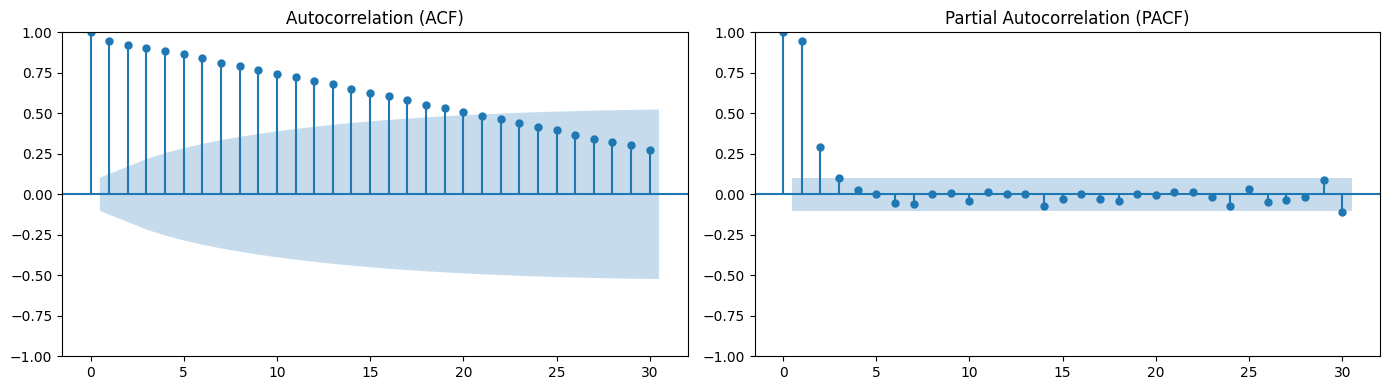

In [ ]:
# ACF dan PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_daily, lags=30, ax=axes[0])
plot_pacf(df_daily, lags=30, ax=axes[1])
axes[0].set_title('Autocorrelation (ACF)')
axes[1].set_title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()

## Data Preparation

In [ ]:
df.drop(columns=['Hour', 'Week', 'Month'], inplace=True)

/tmp/ipython-input-1897351936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Hour', 'Week', 'Month'], inplace=True)


In [ ]:
df_daily = df.resample('D').agg(
    {
        'Quantity Ordered': 'sum',  # Total quantity ordered each day
        'Price Each': 'mean',  # Average price each day
        'Order ID': pd.Series.nunique,  # Number of unique orders each day
        'Total': 'sum' # Total Revenue each day
    }
).rename(columns={'Order ID': 'total_orders', 'Total': 'Revenue'})

### Advanced Feature Engineering

In [ ]:
# Ekstraksi fitur waktu & kalender
def create_time_features_daily_power(df_input):
    df_output = df_input.copy()
    df_output['month'] = df_output.index.month
    df_output['day'] = df_output.index.day # day of month
    df_output['dayofweek'] = df_output.index.dayofweek
    df_output['dayofyear'] = df_output.index.dayofyear
    df_output['weekofyear'] = df_output.index.isocalendar().week.astype(int)
    df_output['quarter'] = df_output.index.quarter
    df_output['is_weekend'] = (df_output.index.dayofweek >= 5).astype(int) # Sabtu=5, Minggu=6

    # Fitur siklik untuk seasonal
    df_output['dayofweek_sin'] = np.sin(2 * np.pi * df_output['dayofweek']/7)
    df_output['dayofweek_cos'] = np.cos(2 * np.pi * df_output['dayofweek']/7)
    df_output['dayofyear_sin'] = np.sin(2 * np.pi * df_output['dayofyear']/365)
    df_output['dayofyear_cos'] = np.cos(2 * np.pi * df_output['dayofyear']/365)
    df_output['month_sin'] = np.sin(2 * np.pi * df_output['month']/12)
    df_output['month_cos'] = np.cos(2 * np.pi * df_output['month']/12)
    return df_output

df_features = create_time_features_daily_power(df_daily) # gunakan df_daily yang sudah bersih


# Pembuatan fitur lag & rolling window dari 'Total'
def create_lag_rolling_features_power(df_input):
    df_temp = df_input.copy()
    target_col = 'total_orders'

    # Lag features dari target
    df_temp[f'{target_col}_lag_1'] = df_temp[target_col].shift(1) # Kemarin
    df_temp[f'{target_col}_lag_7'] = df_temp[target_col].shift(7) # Seminggu lalu (seasonal mingguan)
    df_temp[f'{target_col}_lag_365'] = df_temp[target_col].shift(365) # Setahun lalu (seasonal tahunan)

    # Rolling window features dari target
    df_temp[f'{target_col}_rolling_mean_7'] = df_temp[target_col].rolling(window=7, min_periods=1).mean()
    df_temp[f'{target_col}_rolling_std_7'] = df_temp[target_col].rolling(window=7, min_periods=1).std()
    df_temp[f'{target_col}_rolling_mean_30'] = df_temp[target_col].rolling(window=30, min_periods=1).mean()

    return df_temp

df_features = create_lag_rolling_features_power(df_features)


# Handling missing values dari Fitur
# Isi NaN yang tersisa setelah shift/rolling dengan rata-rata kolom
for col in df_features.columns:
    if df_features[col].isnull().any():
        df_features[col].fillna(df_features[col].mean(), inplace=True) # Mengisi dengan rata-rata kolom

print(f"Ukuran data setelah feature engineering: {df_features.shape[0]} baris")

Ukuran data setelah feature engineering: 365 baris


/tmp/ipython-input-698230062.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features[col].fillna(df_features[col].mean(), inplace=True) # Mengisi dengan rata-rata kolom


In [ ]:
df_features

,Quantity Ordered,Price Each,total_orders,Revenue,month,day,dayofweek,dayofyear,weekofyear,quarter,...,dayofyear_sin,dayofyear_cos,month_sin,month_cos,total_orders_lag_1,total_orders_lag_7,total_orders_lag_365,total_orders_rolling_mean_7,total_orders_rolling_std_7,total_orders_rolling_mean_30
Order Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,343.0,216.625530,287,65681.94,1,1,1,1,1,1,...,1.721336e-02,0.999852,5.000000e-01,0.866025,488.087912,483.312849,NaN,287.000000,26.897259,287.000000
2019-01-02,367.0,217.516533,308,70663.20,1,2,2,2,1,1,...,3.442161e-02,0.999407,5.000000e-01,0.866025,287.000000,483.312849,NaN,297.500000,14.849242,297.500000
2019-01-03,330.0,158.086959,286,47046.20,1,3,3,3,1,1,...,5.161967e-02,0.998667,5.000000e-01,0.866025,308.000000,483.312849,NaN,293.666667,12.423097,293.666667
2019-01-04,329.0,210.810648,282,62000.22,1,4,4,4,1,1,...,6.880243e-02,0.997630,5.000000e-01,0.866025,286.000000,483.312849,NaN,290.750000,11.701140,290.750000
2019-01-05,355.0,149.872143,301,46524.63,1,5,5,5,1,1,...,8.596480e-02,0.996298,5.000000e-01,0.866025,282.000000,483.312849,NaN,292.800000,11.122050,292.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,867.0,163.550403,734,126604.07,12,27,4,361,52,4,...,-6.880243e-02,0.997630,-2.449294e-16,1.000000,767.000000,778.000000,NaN,770.285714,30.565309,751.433333
2019-12-28,928.0,162.765159,789,133601.53,12,28,5,362,52,4,...,-5.161967e-02,0.998667,-2.449294e-16,1.000000,734.000000,749.000000,NaN,776.000000,29.647934,760.666667
2019-12-29,953.0,183.505321,800,156009.67,12,29,6,363,52,4,...,-3.442161e-02,0.999407,-2.449294e-16,1.000000,789.000000,758.000000,NaN,782.000000,29.647934,768.766667


### Split the Data (Time-Based Splitting)

In [ ]:
# Split data training, validasi, & testing menggunakan rasio
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

total_days = len(df_features)
train_size = int(total_days * train_ratio)
val_size = int(total_days * val_ratio)
test_size = total_days - train_size - val_size # mengambil sisa untuk memastikan totalnya pas

# Tentukan tanggal split berdasarkan jumlah hari (opsional y)
split_date_val = df_features.index[train_size - 1]
split_date_test = df_features.index[train_size + val_size - 1]

# Define target
target_col = 'total_orders'

# Kolom-kolom yang akan digunakan sebagai fitur (selain target) untuk model ML
ml_features = [col for col in df_features.columns if col != target_col and '_adjusted' not in col] # Exclude adjusted target

# Split data untuk model ML
X_train_ml = df_features.iloc[:train_size][ml_features]
y_train_ml = df_features.iloc[:train_size][target_col]

X_val_ml = df_features.iloc[train_size:train_size + val_size][ml_features]
y_val_ml = df_features.iloc[train_size:train_size + val_size][target_col]

X_test_ml = df_features.iloc[train_size + val_size:][ml_features]
y_test_ml = df_features.iloc[train_size + val_size:][target_col]

# Data target untuk model time series klasik
y_train_ts = df_daily[target_col].iloc[:train_size]
y_val_ts = df_daily[target_col].iloc[train_size:train_size + val_size]
y_test_ts = df_daily[target_col].iloc[train_size + val_size:]

print(f"Ukuran Data Training ML: {len(X_train_ml)} hari")
print(f"Ukuran Data Validation ML: {len(X_val_ml)} hari")
print(f"Ukuran Data Testing ML: {len(X_test_ml)} hari")
print(f"Ukuran Data Training TS: {len(y_train_ts)} hari")
print(f"Ukuran Data Validation TS: {len(y_val_ts)} hari")
print(f"Ukuran Data Testing TS: {len(y_test_ts)} hari")

Ukuran Data Training ML: 219 hari
Ukuran Data Validation ML: 73 hari
Ukuran Data Testing ML: 73 hari
Ukuran Data Training TS: 219 hari
Ukuran Data Validation TS: 73 hari
Ukuran Data Testing TS: 73 hari


## Modelling

### Fungsi untuk Evaluation Metrics & Visualisasi Model

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    # Memastikan prediksi tidak negatif (karena konsumsi listrik tidak mungkin negatif)
    y_pred = np.maximum(0, y_pred) # Konsumsi tidak bisa negatif
    # Menghitung Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Menghitung Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    # Menghitung Mean Absolute Percentage Error (MAPE)
    # Menghindari pembagian dengan nol jika ada nilai aktual 0
    y_true_cleaned = y_true.copy()
    y_true_cleaned[y_true_cleaned == 0] = 1e-9 # Ganti 0 dengan small number untuk menghindari pembagian angka 0

    mape = np.mean(np.abs((y_true - y_pred) / y_true_cleaned)) * 100
    print(f"{model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")

    return rmse, mae, mape

# Fungsi untuk visualisasi perbandingan forecast vs aktual
def plot_predictions(y_train, y_val, y_test, y_pred_val, y_pred_test, model_name):
    plt.figure(figsize=(15, 6))
    plt.plot(y_train.index, y_train, label='Data Historis (Train)', color='blue', alpha=0.7)

    if y_val is not None:
      plt.plot(y_val.index, y_val, label='Data Validasi (Aktual)', color='black', linewidth=2)
      if y_pred_val is not None:
        y_pred_val_series = pd.Series(y_pred_val, index=y_val.index)
        plt.plot(y_val.index, y_pred_val_series, label=f'Prediksi {model_name} (Validasi)', linestyle='--', color='red')


    if y_test is not None:
      plt.plot(y_test.index, y_test, label='Data Testing (Aktual)', color='green', linewidth=2)
      if y_pred_test is not None:
        y_pred_test_series = pd.Series(y_pred_test, index=y_test.index)
        plt.plot(y_test.index, y_pred_test_series, label=f'Prediksi {model_name} (Testing)', linestyle='--', color='orange')


    plt.title(f'Prediksi {model_name} vs. Aktual', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Orders', fontsize=12)

    plt.axvline(x=y_train.index.max(), color='grey', linestyle=':', label='Akhir Data Historis')

    if y_val is not None and len(y_val) > 0:
      plt.axvline(x=y_val.index.max(), color='gray', linestyle='--', label='Akhir Data Validasi')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Exponential Smoothing (Holt-Winters)

Holt-Winters (Validation)
RMSE: 127.3709
MAE: 74.8900
MAPE: 13.21%


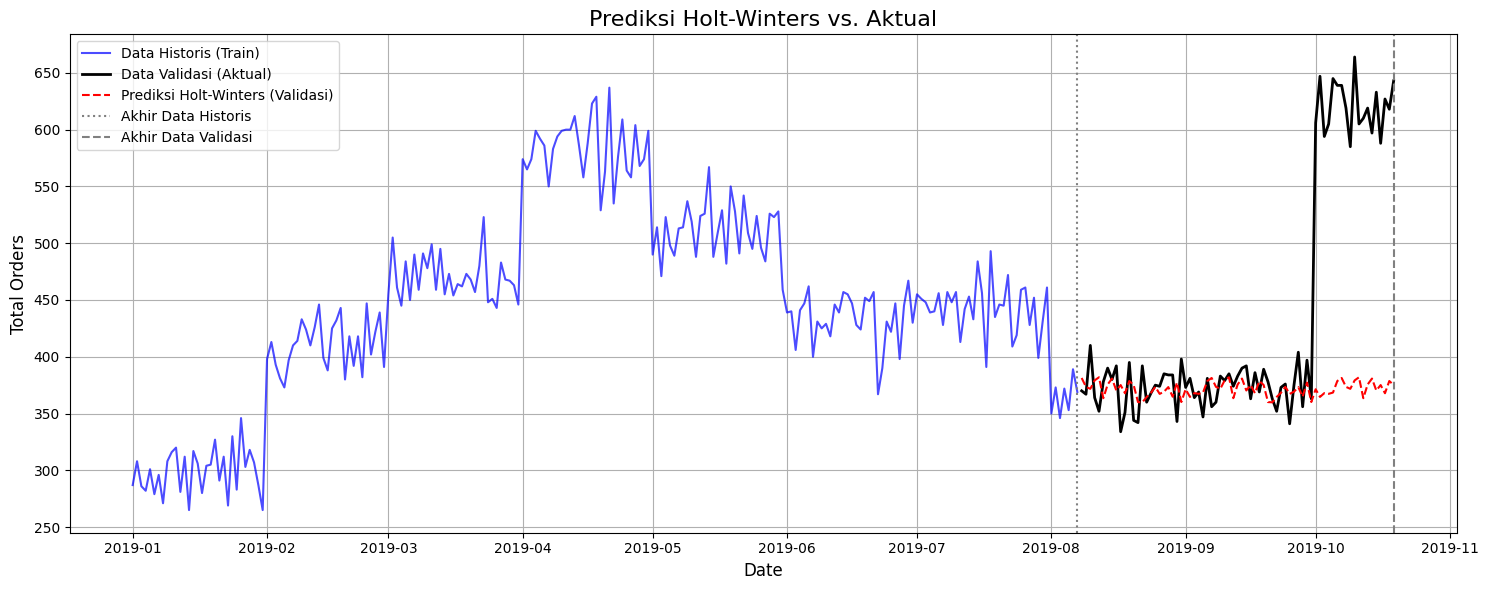

In [ ]:
# Pemodelan
hw_model = ExponentialSmoothing(y_train_ts, seasonal='multiplicative', seasonal_periods=30).fit() # latih model
y_pred_hw_val = hw_model.forecast(len(y_val_ts)) # prediksi

rmse_hw_val, mae_hw_val, mape_hw_val = evaluate_model(y_val_ts, y_pred_hw_val, "Holt-Winters (Validation)")
plot_predictions(y_train_ts, y_val_ts, None, y_pred_hw_val, None, "Holt-Winters")

### Random Forest Regressor

Random Forest Regressor (Validation)
RMSE: 12.2202
MAE: 9.2981
MAPE: 2.06%


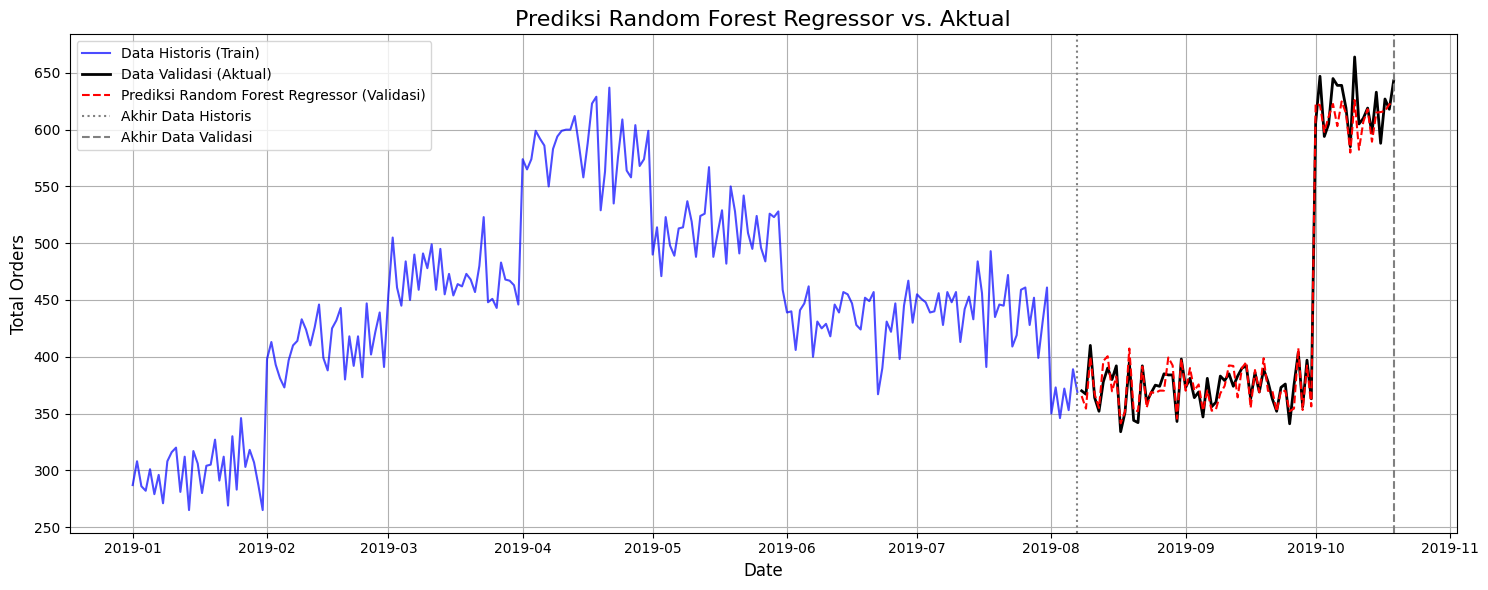

In [ ]:
# Pemodelan

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_ml, y_train_ml)

y_pred_rf_val = rf_model.predict(X_val_ml)

rmse_rf_val, mae_rf_val, mape_rf_val = evaluate_model(y_val_ml, y_pred_rf_val, "Random Forest Regressor (Validation)")
plot_predictions(y_train_ml, y_val_ml, None, y_pred_rf_val, None, "Random Forest Regressor")

### Re-train the best model and then make predictions on the test data

Random Forest Regressor (Test)
RMSE: 84.3604
MAE: 59.5849
MAPE: 7.90%


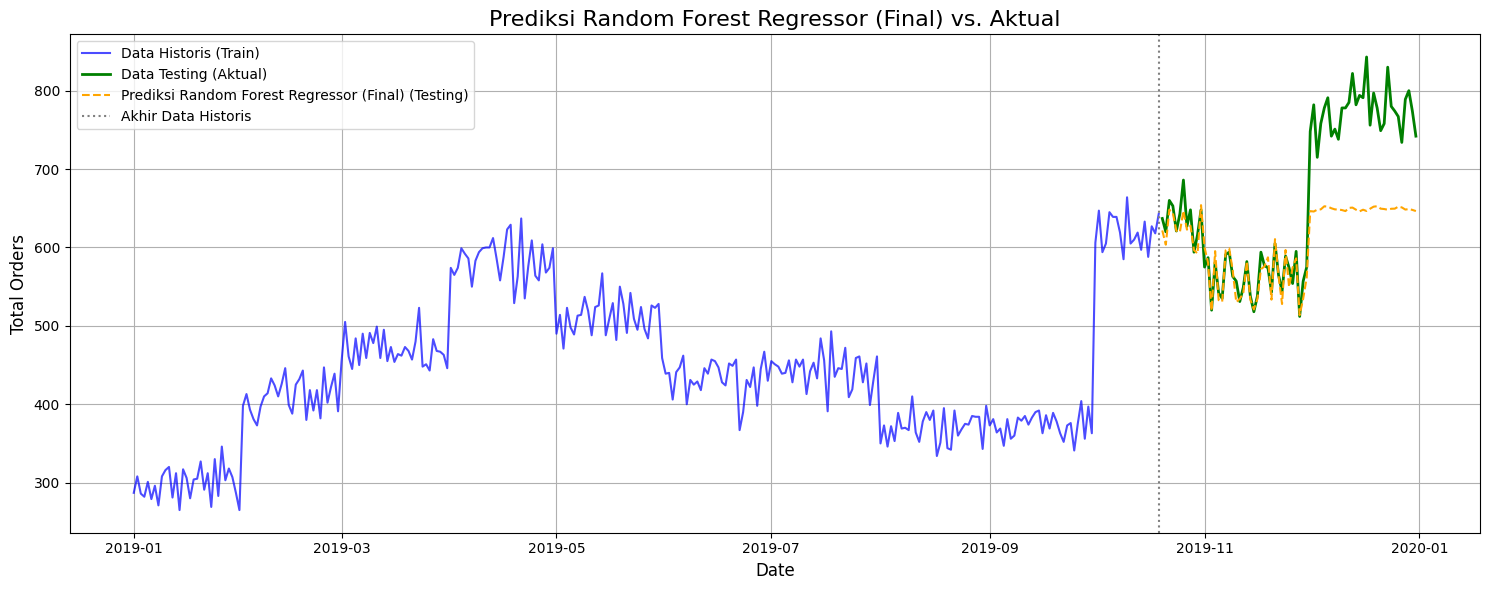

In [ ]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

X_train_val_ml = pd.concat([X_train_ml, X_val_ml])
y_train_val_ml = pd.concat([y_train_ml, y_val_ml])

best_model.fit(X_train_val_ml, y_train_val_ml)

y_pred_test_best_model = best_model.predict(X_test_ml)

rmse_test_best, mae_test_best, mape_test_best = evaluate_model(y_test_ml, y_pred_test_best_model, "Random Forest Regressor (Test)")

plot_predictions(y_train_val_ml, None, y_test_ml, None, y_pred_test_best_model, "Random Forest Regressor (Final)")